# Bay Wheels Data Exploration
## by Kerui Chen

## Investigation Overview

> I am interested in finding out the location related features to the trip durations and who would be more interested in long trips, causuals or members? And how the seasonality is associated with the number of trips.

## Dataset Overview

> This dataset explores Bay Wheels trip data from January 2019 to December 2019. This dataset contains 2506983 data which all have details of each bike trip, including duration, start/end time, start/end station information, bike ID, and user type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('data.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of trips per month

> There is no clear trending for the trips across the year, but the summer and fall can be considered as peak season, while winter is defintley the slow business for bike riding.

<Figure size 720x864 with 0 Axes>

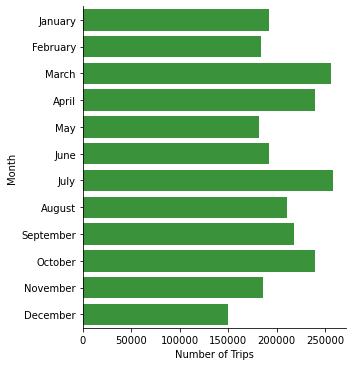

In [3]:
color = sb.color_palette()[2]

plt.figure(figsize=[10,12]);

graph = sb.catplot(data = data, y = 'Month', kind = 'count',color = color);

graph.set_axis_labels('Number of Trips', 'Month');

## Monthly average trip distance

> For this monthly average trip chart, what is different from our expectations is that average trip distance in the winter is similiar or even higher than the summer times, it will be interesting to explore further if we have more access to different data.

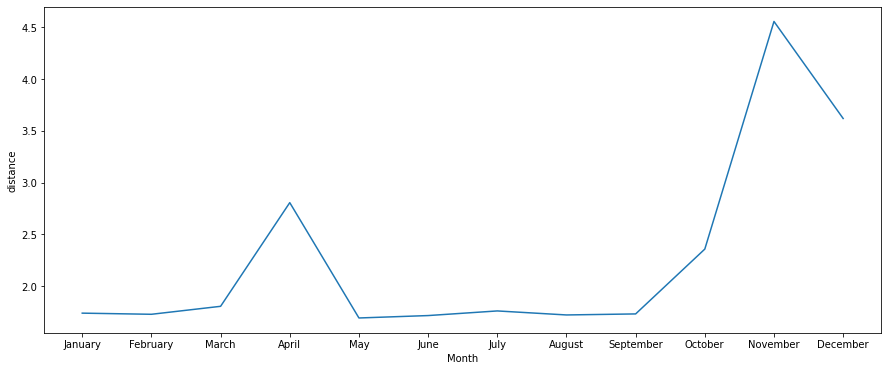

In [4]:
valid_trip = data[data['distance']!=0]

monthly_average = pd.DataFrame(valid_trip.groupby('Month')['distance'].mean())

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_average = monthly_average.reindex(month)

plt.figure(figsize=[15,6]);
graph = sb.lineplot(data=monthly_average, x=monthly_average.index, y="distance",sort= False);

## Trip duration for subscriber vs. customer

> We can tell from this visualization that subscribers are more frequently use the bikes and usually have shorter trips which could be considered as normal short commute for everyday.

<Figure size 1440x576 with 0 Axes>

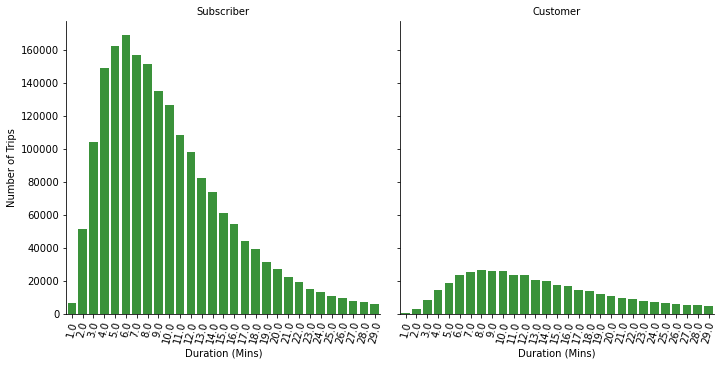

In [5]:
plt.figure(figsize=[20, 8])

data = valid_trip.query('duration_min < 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count',color = color);

graph.set_axis_labels('Duration (Mins)', 'Number of Trips')
graph.set_titles('{col_name}')

graph.set_xticklabels(rotation=75);

## Monthly Distance for Customers and Subscribers

> From this chart, we can tell that the peak time dor customer use is in December and mostly in short distance trips as well. For subscribers, the distributions are rather even except that the December is the low month, and March and April are the months with higher uses.

<Figure size 432x288 with 0 Axes>

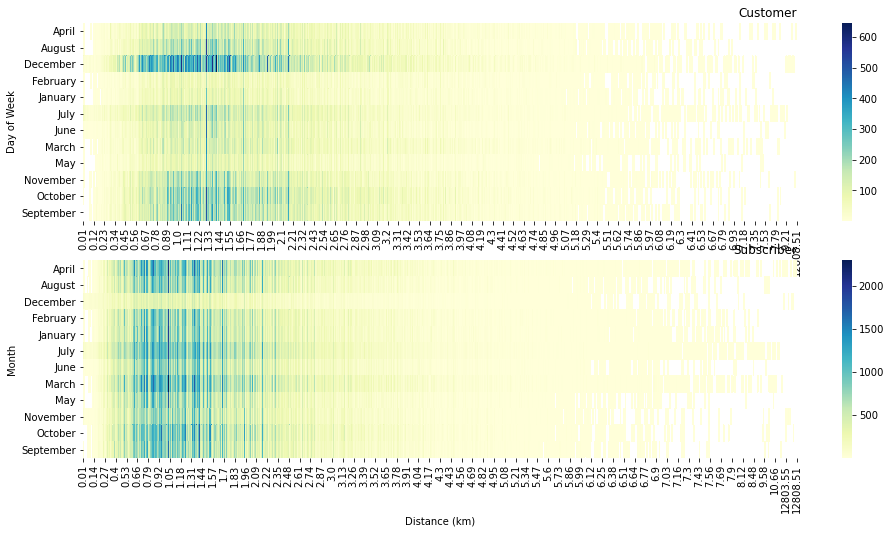

In [6]:
plt.suptitle('Monthly Distance for Customers and Subscribers')
#fig, ax = plt.subplots(figsize=(5,5)) 

plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
customers = data.query('user_type == "Customer"')
ct_counts = customers.groupby(['Month', 'distance']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='Month', columns='distance', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Distance (km)');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = data.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['Month', 'distance']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='Month', columns='distance', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Distance (km)');
plt.ylabel('Month');